## Camera Geometry

A camera is a device that transforms the 3D environment, called **world space**, that it observes into a 2D image, called **image space**. We can model this transformation by a **central projection** of the 3D space on a plane.

![Camera Geometry](perspective.png "projection")


______________________________________________________________________
Notes:
- camera est a 0,0 son axe de visée est l'axe Z.
- on projette un objet X sur un plan focal de distance focale z.

Homogenuous :
- Translation peut etre exprimée en multiplication en coord homo (d'habitude c'est une somme).




_______________________________________________________________________






Let's assume that the center of projection, called the **optical center**, is at the origin of the axes and that the plane $z = f$, which we will call the **focal plane**, is the plane of projection. The point $\vec{X} = (x, y, z)^T$ of the world space is projected onto the point of intersection of the focal plane and the line passing through $\vec{X}$ and the center of projection. The point, result of the projection of the point $\vec{X}$, is called **image point** and noted $\vec{x}$, the projected point $\vec{X}$ is called **world point**. It is easy to find that $\vec{x} = (\frac{fx}{z}, \frac{fy}{z}, f)^T$. Let's drop the third component:

$$\left(\begin{array}{c} x \\ y \\ z \end{array}\right) \rightarrow \left(\begin{array}{c} fx/z \\ fy/z \end{array}\right)$$

The line perpendicular to the focal plane and passing through the optical center is called the **principal axis** and the point of intersection of the principal axis with the focal plane is called the **principal point**. The plane parallel to the focal plane and passing through the optical center is called the **principal plane**.

### Homogeneous Coordinates

A central projection like this one can easily be represented as a matrix multiplication as long as we work in homogeneous coordinates. In homogeneous coordinates, each 3D point is represented by a quadruplet $(X, Y, Z, T)^T$. We can find the classical cartesian coordinates by dividing by the last component:

$$\begin{pmatrix}X \\ Y \\ Z \\ T\end{pmatrix} \rightarrow \begin{pmatrix}X/T \\ Y/T \\ Z/T\end{pmatrix}$$

It can be seen, therefore, that the homogeneous coordinates are defined to within a scalar factor:

$$\begin{pmatrix}X \\ Y \\ Z \\ T\end{pmatrix} \Leftrightarrow \begin{pmatrix}kX \\ kY \\ kZ \\ kT\end{pmatrix}$$

### Projection Matrix

In homogeneous coordinates, the central projection described above can be written as a **matrix multiplication**:

$$\begin{equation}
\left(\begin{array}{c} x \\ y \\ z \\ 1 \end{array}\right) \rightarrow \left(\begin{array}{c} fx \\ fy \\ z \end{array}\right) = \left(\begin{array}{cccc} f & & & 0 \\ & f & & 0 \\ & & 1 & 0 \end{array}\right) \left(\begin{array}{c} x \\ y \\ z \\ 1 \end{array}\right)
\end{equation}$$

The form of the projection matrix is particularly simple because we have chosen our axes favorably. In a more general case, the world coordinates are not aligned with the camera axes and the projection matrix can be calculated as follows:

$$\left(\begin{array}{cccc} f & & & 0 \\ & f & & 0 \\ & & 1 & 0 \end{array}\right)\left(\begin{array}{cc} R & -RC \\ 0 & 1 \end{array}\right)$$

Where $R$ is the $3\times3$ **rotation matrix** which represents the **orientation** of the camera frame of reference with respect to the world frame of reference, and $C$ is the column matrix of coordinates of the **optical center** of the camera in the world frame of reference.

Finally, to take into account the fact that the coordinates in an image are generally given in pixels with the origin in the upper left corner and with the $y$ axis directed downwards, we will use the following form:

$$\left(\begin{array}{cccc} mf & & p_x & 0 \\ & -mf & p_y & 0 \\ & & 1 & 0 \end{array}\right)\left(\begin{array}{cc} R & -RC \\ 0 & 1 \end{array}\right)$$

Where $(p_x, p_y)$ are the **pixel coordinates** of the center of the image and $m$ is the number of pixels per unit length. The parameters of the left matrix are called **intrinsic parameters** of the camera. They do not depend on the position of the camera. The parameters of the right matrix are called **extrinsic parameters** of the camera. They depend on the position and orientation of the camera.

### Exercise 1
You are asked, from the 3D coordinates of the vertices of a cube:

In [1]:
x = [1, -1, -1,  1, 1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1]
y = [1,  1, -1, -1, 1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1]
z = [1,  1,  1,  1, 1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1]
# Some vertices appear several times to facilitate the display with plot()

To define a projection matrix to obtain the projected image of a cube:

![Cube](cube.png "cube")

To do this, you must use the Python language in a **JupyterLab** environment with the `numpy` and `matplotlib` libraries.

To create a matrix with `numpy` you need to use two dimensional lists and the `np.array()` function:

$$M = \begin{pmatrix}1 & 2 & 3 \\ 4 & 5 & 6\end{pmatrix}$$

In [2]:
import numpy as np

M = np.array([[1, 2, 3], [4, 5, 6]])

So you can easily create a matrix containing all the coordinates of your vertices:

In [3]:
Xcube = np.array([x, y, z, [1]*16])
print(Xcube)

[[ 1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1]
 [ 1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1]
 [ 1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]]


The mutliplication between two matrices is done with the `@` operator:

$$\begin{pmatrix}1 & 2 & 3 \\ 4 & 5 & 6\end{pmatrix} \begin{pmatrix}1 \\ 0 \\ 0\end{pmatrix} = \begin{pmatrix}1 \\ 4\end{pmatrix}$$

In [4]:
N = np.array([[1], [0], [0]])

print(M @ N)

[[1]
 [4]]


To display the result we use the `plt.plot()` function which takes a list of abscissa and a list of ordinate.

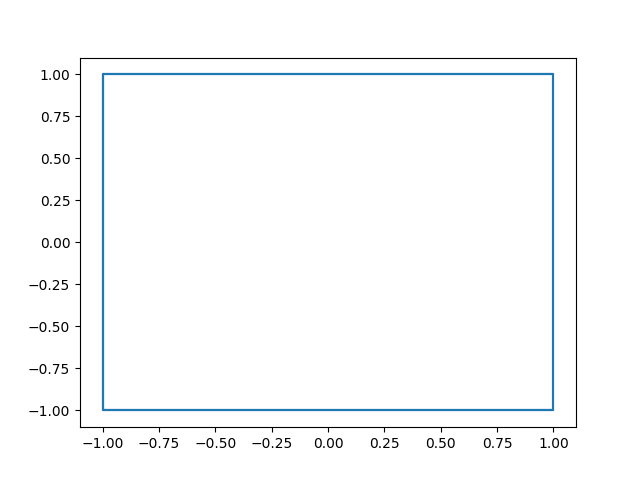

In [5]:
# This special line activate ipympl to get interactive plots
%matplotlib ipympl
from matplotlib import pyplot as plt

# numpy supports matlab index notation here we get the
# classical coordinates from homogeneous coordinates by
# dividing by the fourth component
xi = Xcube[0, :]/Xcube[3, :]  
yi = Xcube[1, :]/Xcube[3, :]

plt.figure()
plt.plot(xi, yi)
plt.show()

When used alone, `plt.plot()` automatically sets the size and axes of the graph. To display a $640 \times 480$ image with the $y$ axis down, you can do the following:

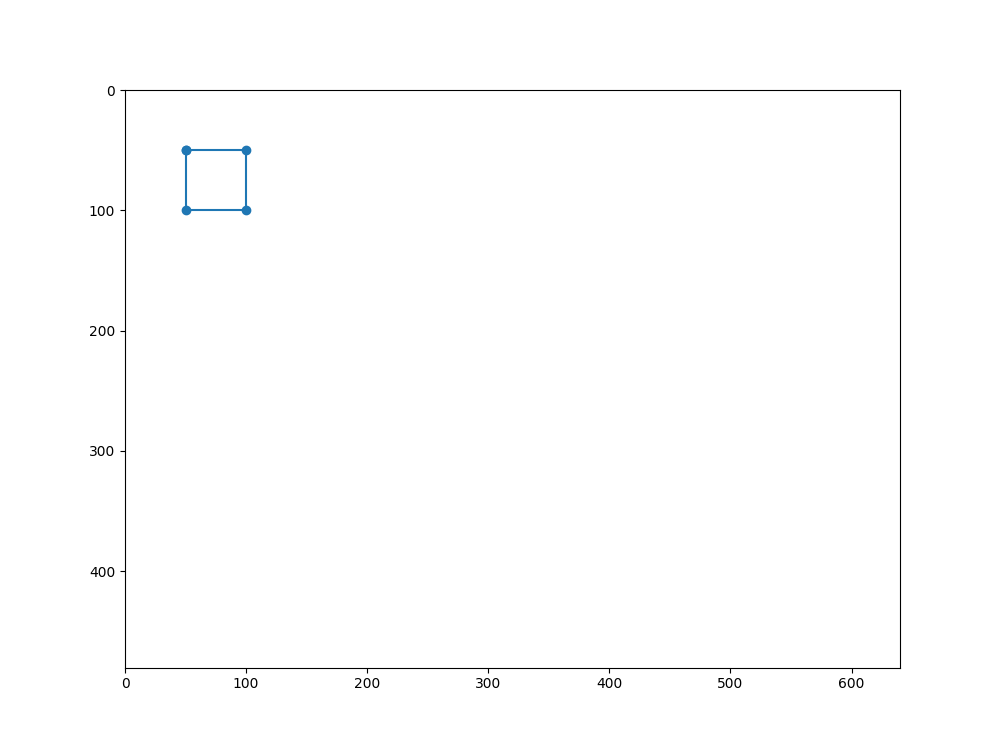

In [6]:
factor = 2.5
plt.figure(figsize=(4*factor, 3*factor))  # taille de l'image en pouces
plt.axis([0, 640, 480, 0])
plt.plot([50, 50, 100, 100, 50], [50, 100, 100, 50, 50], "-o")  # "-o" pour traits et cercle
plt.show()

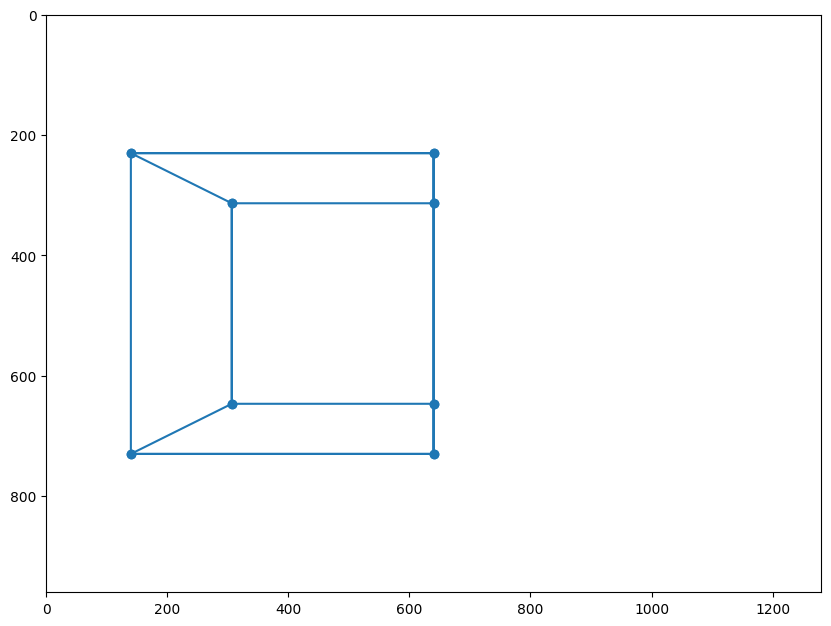

In [48]:
import numpy as np
from matplotlib import pyplot as plt
# Let a cube, centered at the origin, of vertices 1.
x = [1, -1, -1,  1, 1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1]
y = [1,  1, -1, -1, 1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1]
z = [1,  1,  1,  1, 1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1]

#  Create the 3D coordinates of the vertices of a cube:
M = np.array([[1, 2, 3], [4, 5, 6]])
Xcube = np.array([x, y, z, [1]*16])

#____________________________________________________________

# Define camera center position ()
C = np.array([[1, 0, -5]]).T   # TRANSPOSED 


# --- Extrinsic Params ----
theta = 0# np.pi/3
R = np.array([[np.cos(theta), 0 , np.sin(theta)], [0, 1, 0], [-np.sin(theta), 0, np.cos(theta)]])


# --- Intrinsic Params ---
f = 10
m = 100
p_x = 640
p_y = 480
# Central Projection Matrix
P = np.array(  [[m*f, 0, p_x, 0], [0, -m*f, p_y, 0], [0, 0,  1, 0]])


# ---- M : MATRIX -----
top = np.hstack([R,-R@C])
bottom = np.array([0,0,0,1])
extrinsic_mat = np.vstack((top, bottom))
M = P @ extrinsic_mat

X_w = M @ Xcube
xi = X_w[0, :]/X_w[2, :]  
yi = X_w[1, :]/X_w[2, :]
factor = 2.5
plt.figure(figsize=(4*factor, 3*factor))  # taille de l'image en pouces
plt.axis([0, 2*p_x, 2*p_y, 0])
plt.plot(xi, yi, "-o")  # "-o" pour traits et cercle
plt.show()



## Camera calibration
______________________________________________________________________
Notes:
- calibrating a camera looking at a flat plane
- but: trouver la matrice m_xy qui transforme x_i, y_i en x_w et y_w.
- donc trouver 9 inconnues m_11 à m_33
- on fixe une de ces valeurs m_33 = 1
- Substitute (3 -> 1 and 3->2)

- resolution du système linéaire A*m = b <=> m = A^-1 * b



_______________________________________________________________________

The camera calibration consists in finding the projection matrix of a camera starting from points in an image whose coordinates in the world space are known.

Here we will perform a calibration in a simplified case. The world coordinates will be in 2D. This is a very useful case in practice when we are interested in objects that move on a plane.

When the coordinates are in 2D, the projection matrix becomes a $3 \times 3$ matrix and as this matrix is defined to within a scalar factor, there are only 8 independent parameters. This means that we can fix one of the components of the matrix. We usually fix the lower right corner at 1.

$$\begin{pmatrix} sx_i \\ sy_i \\ s \end{pmatrix} = \begin{pmatrix}m_{11} & m_{12} & m_{13} \\ m_{21} & m_{22} & m_{23} \\ m_{31} & m_{32} & 1 \end{pmatrix}\begin{pmatrix} x_w \\ y_w \\ 1 \end{pmatrix}$$

The image coordinates are also defined to within a factor $s$.

When we know the coordinates of a point in the image and in the world, we can write the following equations

$$
\begin{array}{ll}
& \begin{cases}
sx_i & = m_{11}x_w + m_{12}y_w + m_{13} \\
sy_i & = m_{21}x_w + m_{22}y_w + m_{23} \\
s & = m_{31}x_w + m_{32}y_w + 1
\end{cases} \\


\Leftrightarrow & \begin{cases}
0 & = (m_{11} - m_{31}x_i)x_w + (m_{12} - m_{32}x_i)y_w + (m_{13}-x_i) \\
0 & = (m_{21} - m_{31}y_i)x_w + (m_{22} - m_{32}y_i)y_w + (m_{23}-y_i)
\end{cases} \\
\Leftrightarrow & \begin{cases}
x_i &= &x_wm_{11} &+ y_wm_{12} &+ m_{13} &+ 0m_{21} &+ 0m_{22} &+ 0m_{23} &- x_ix_wm_{31} &- x_iy_wm_{32} \\
y_i &= &0m_{11} &+ 0m_{12} &+ 0m_{13} &+ x_wm_{21} &+ y_wm_{22} &+ m_{23} &- y_ix_wm_{31} &- y_iy_wm_{32}
\end{cases} \\
\Leftrightarrow & \begin{pmatrix}x_i \\ y_i\end{pmatrix}=\begin{pmatrix}x_w & y_w & 1 & & & & -x_ix_w & -x_iy_w \\ & & & x_w & y_w & 1 & -y_ix_w & -y_iy_w \end{pmatrix}\begin{pmatrix}m_{11} \\ m_{12} \\ m_{13} \\ m_{21} \\ m_{22} \\ m_{23} \\ m_{31} \\ m_{32} \end{pmatrix}
\end{array}
$$

So we have 2 equations per point. As we have 8 unknowns to know the projection matrix, we need 4 points:

$$\begin{pmatrix}x_{1i} \\ y_{1i} \\ x_{2i} \\ y_{2i} \\ x_{3i} \\ y_{3i} \\ x_{4i} \\ y_{4i} \end{pmatrix}=\begin{pmatrix}x_{1w} & y_{1w} & 1 & & & & -x_{1i}x_{1w} & -x_{1i}y_{1w} \\ & & & x_{1w} & y_{1w} & 1 & -y_{1i}x_{1w} & -y_{1i}y_{1w} \\ x_{2w} & y_{2w} & 1 & & & & -x_{2i}x_{2w} & -x_{2i}y_{2w} \\ & & & x_{2w} & y_{2w} & 1 & -y_{2i}x_{2w} & -y_{2i}y_{2w} \\ x_{3w} & y_{3w} & 1 & & & & -x_{3i}x_{3w} & -x_{3i}y_{3w} \\ & & & x_{3w} & y_{3w} & 1 & -y_{3i}x_{3w} & -y_{3i}y_{3w} \\ x_{4w} & y_{4w} & 1 & & & & -x_{4i}x_{4w} & -x_{4i}y_{4w} \\ & & & x_{4w} & y_{4w} & 1 & -y_{4i}x_{4w} & -y_{4i}y_{4w} \end{pmatrix}\begin{pmatrix}m_{11} \\ m_{12} \\ m_{13} \\ m_{21} \\ m_{22} \\ m_{23} \\ m_{31} \\ m_{32} \end{pmatrix}$$

$$\begin{pmatrix}m_{11} \\ m_{12} \\ m_{13} \\ m_{21} \\ m_{22} \\ m_{23} \\ m_{31} \\ m_{32} \end{pmatrix}=\begin{pmatrix}x_{1w} & y_{1w} & 1 & & & & -x_{1i}x_{1w} & -x_{1i}y_{1w} \\ & & & x_{1w} & y_{1w} & 1 & -y_{1i}x_{1w} & -y_{1i}y_{1w} \\ x_{2w} & y_{2w} & 1 & & & & -x_{2i}x_{2w} & -x_{2i}y_{2w} \\ & & & x_{2w} & y_{2w} & 1 & -y_{2i}x_{2w} & -y_{2i}y_{2w} \\ x_{3w} & y_{3w} & 1 & & & & -x_{3i}x_{3w} & -x_{3i}y_{3w} \\ & & & x_{3w} & y_{3w} & 1 & -y_{3i}x_{3w} & -y_{3i}y_{3w} \\ x_{4w} & y_{4w} & 1 & & & & -x_{4i}x_{4w} & -x_{4i}y_{4w} \\ & & & x_{4w} & y_{4w} & 1 & -y_{4i}x_{4w} & -y_{4i}y_{4w} \end{pmatrix}^{-1}\begin{pmatrix}x_{1i} \\ y_{1i} \\ x_{2i} \\ y_{2i} \\ x_{3i} \\ y_{3i} \\ x_{4i} \\ y_{4i} \end{pmatrix}$$

### Exercise 2
From a photo of a document taken at an angle:

![Cover](cover.jpg "cover")

You will need to calibrate your camera and produce a flattened version of the document:

![Flat Cover](flat.png "flat")

The 4 known points are the 4 corners of the document. You can select them with the mouse and retrieve their coordinates using the following code:

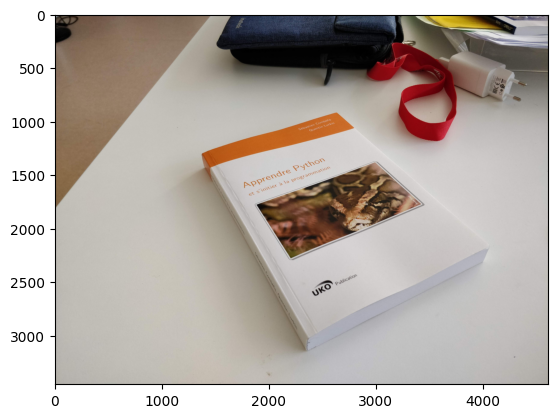

In [40]:
# import to load images
import matplotlib.image as mpimg

# image loading
img = mpimg.imread('cover.jpg')

fig = plt.figure()
points = [[], []]

# function to be called on each click on the image
def onclick(event):
    # save the point
    print(f'Pixel Coordinates (x, y): ({int(event.xdata)}, {int(event.ydata)})')
    points[0].append(event.xdata)
    points[1].append(event.ydata)
    # show a cross
    plt.plot([event.xdata], [event.ydata], "x")

# register the click listener
fig.canvas.mpl_connect('button_press_event', onclick)

# display the image
plt.imshow(img)
plt.show()

![thing](corners.png "les coins")

Once the points are selected in the image, their coordinates are stored in the variable `points`.

In [41]:
print(points)

[[], []]


When you load an image, it becomes a 3 dimensional matrix `img[y][x][chanel]`. Be careful the first coordinate is $y$ followed by $x$ then the red/green/blue channel for color images.

When you create the flattened image, you must respect this structure.

To know the real coordinates of the 4 corners of your document, base yourself on the document format (A4 for example).

To create your result image, you just have to project each pixel of the result image on the starting image and copy the color of the starting image to the result image.

![machin](projection.png "projection")

![machin](flat.png "flat")

In [ ]:
#L595, H842








Homography Matrix H:
[[ 3.39031915e-01  3.39460505e-02  1.37500000e+03]
 [-6.38759489e-02  1.72672013e-01  1.30100000e+03]
 [ 2.47461574e-05 -1.05095076e-04  1.00000000e+00]]


Notes:

Homography Estimation. You're trying to find a transformation (a 3x3 matrix) that maps points from one plane (your "world" coordinates) to another plane (your "image" coordinates).


projection 2D -> 2D

donc s*(xi, yi, zi) = H * (xw, yw, 1) = [m11, m12,... m33] * //

s is a random scale factor (because of the perspective effect, things get bigger/smaller).

We fix m_{33} = 1 to avoid the trivial solution where all elements are zero. This leaves us with 8 unknowns.


on connait les 2 coordonnees :
- on choisit les w sur l'image
- on connait les dimensions d'une feuille A4

Reste plus qu'a trouver M


Puis on parcourt les x et y du w (projection, world), on les traduit en les coordonnées images et on obtient la couleur du pixel etc etc



<!--  L592, 842 -->

Homography Matrix H:
[[ 1.81192829e+00  2.00694556e-01  1.37500000e+03]
 [-3.41379775e-01  1.02086494e+00  1.30100000e+03]
 [ 1.32253810e-04 -6.21339130e-04  1.00000000e+00]]


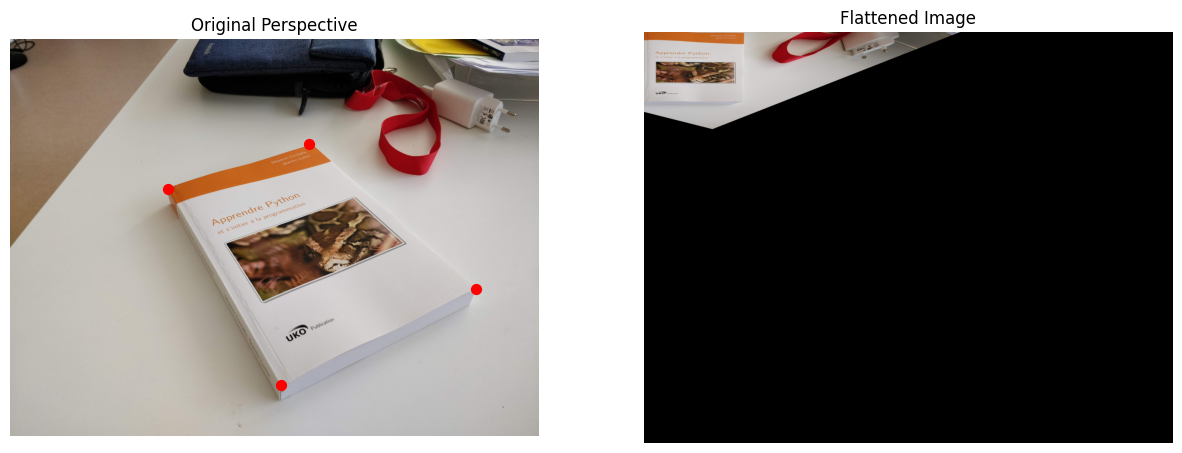

In [ ]:


import numpy as np
from matplotlib import pyplot as plt
import cv2  # OpenCV is essential for warping

# Coordinates from the perspective image
points_image = np.array([
    [1375, 1301],
    [2610, 912],
    [4061, 2176],
    [2363, 3014]    
])  

# Coordinates in the desired flattened "world"
width = 592
height = 842
points_world = np.array([
    [0, 0],
    [842, 0],
    [842, 592],
    [0, 592]
])

# Build the A and b matrices
A = np.zeros((8, 8))
b = np.zeros(8)

for i in range(4):
    x_w, y_w = points_world[i]
    x_i, y_i = points_image[i]
    
    A[2*i, :]   = [x_w, y_w, 1, 0, 0, 0, -x_i*x_w, -x_i*y_w]
    b[2*i]      = x_i
    
    A[2*i+1, :] = [0, 0, 0, x_w, y_w, 1, -y_i*x_w, -y_i*y_w]
    b[2*i+1]    = y_i

# Solve for homography parameters
m = np.linalg.solve(A, b)

# Construct the homography matrix H
H = np.array([
    [m[0], m[1], m[2]],
    [m[3], m[4], m[5]],
    [m[6], m[7], 1.0]
])

print("Homography Matrix H:")
print(H)

# ---- Warp the image ----
# Load your original perspective image
img = cv2.imread("cover.jpg")   # replace with your filename
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert for matplotlib display

# Output dimensions should match the world coordinates size
width, height = 4500, 3500

# Warp perspective
# Warp perspective using the inverse homography
H_inv = np.linalg.inv(H)
warped = cv2.warpPerspective(img, H_inv, (width, height))

# warped = cv2.warpPerspective(img, H, (width, height))

# ---- Display ----
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.title("Original Perspective")
plt.imshow(img)
plt.scatter(points_image[:,0], points_image[:,1], c='red', s=50)  # show calibration points
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Flattened Image")
plt.imshow(warped)
plt.axis("off")

plt.show()
